## Import Libraries

In [1]:
import os
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## Import Data

In [2]:
data_list = os.listdir('output/')

In [3]:
data_list.sort()

In [4]:
data_list

['.DS_Store', 'config_a', 'config_b', 'config_c', 'config_d', 'config_e']

In [5]:
predictions, labels, runs = [], [], []
for output in data_list:
    if output.startswith('config'):
        predictions.append(np.load('output/'+output+'/predictions.npy'))
        labels.append(np.load('output/'+output+'/labels.npy'))
        runs.append(output)

#### Prediction list contains predictions of all the runs and Labels list contains labels of all the runs, while runs contain name of the runs

## Convert output to Class Label ID

In [6]:
for idx,_ in enumerate(predictions):
    predictions[idx] = predictions[idx].argmax(axis=1)

## Confusion Matrix

In [7]:
conf_mat = []
for idx, run_name in enumerate(runs):
    print('Confusion Matrix of Run: {} is-'.format(run_name))
    print(confusion_matrix(labels[idx], predictions[idx]))
    conf_mat.append(confusion_matrix(labels[idx], predictions[idx]))

Confusion Matrix of Run: config_a is-
[[72  0  0 ...  0  0  0]
 [ 0 90  0 ...  0  0  0]
 [ 0  2 52 ...  0  9  0]
 ...
 [ 0  0  0 ... 83  0  0]
 [ 0  0  1 ...  0 67  0]
 [ 0  0  0 ...  1  1 78]]
Confusion Matrix of Run: config_b is-
[[81  0  0 ...  0  0  0]
 [ 0 85  0 ...  0  0  0]
 [ 0  0 60 ...  0  7  0]
 ...
 [ 0  0  0 ... 74  0  0]
 [ 0  0  5 ...  0 62  0]
 [ 0  1  0 ...  0  0 71]]
Confusion Matrix of Run: config_c is-
[[87  0  0 ...  0  0  0]
 [ 0 83  0 ...  0  0  0]
 [ 0  0 59 ...  0  1  0]
 ...
 [ 0  0  0 ... 70  0  0]
 [ 0  0  1 ...  0 56  0]
 [ 0  0  0 ...  0  0 83]]
Confusion Matrix of Run: config_d is-
[[90  0  0 ...  0  0  0]
 [ 0 84  0 ...  0  0  0]
 [ 0  0 62 ...  0  2  0]
 ...
 [ 0  0  0 ... 79  0  0]
 [ 0  0  5 ...  0 54  0]
 [ 0  1  0 ...  0  0 80]]
Confusion Matrix of Run: config_e is-
[[93  0  0 ...  0  0  0]
 [ 0 88  1 ...  0  0  0]
 [ 0  0 75 ...  0  1  0]
 ...
 [ 0  0  0 ... 85  0  0]
 [ 0  0  5 ...  0 63  0]
 [ 0  0  0 ...  0  0 87]]


## Classification Report

In [8]:
accuracy = []
for idx, run_name in enumerate(runs):
    print('Confusion Matrix of Run: {} is-'.format(run_name))
    print(classification_report(labels[idx], predictions[idx]))
    report = classification_report(labels[idx], predictions[idx], output_dict=True)
    accuracy.append(report['accuracy'])

Confusion Matrix of Run: config_a is-
              precision    recall  f1-score   support

           0       0.97      0.72      0.83       100
           1       0.67      0.90      0.77       100
           2       0.67      0.52      0.58       100
           3       0.47      0.64      0.54       100
           4       0.46      0.56      0.50       100
           5       0.76      0.54      0.63       100
           6       0.87      0.72      0.79       100
           7       0.51      0.85      0.63       100
           8       0.88      0.86      0.87       100
           9       0.85      0.88      0.86       100
          10       0.63      0.49      0.55       100
          11       0.50      0.29      0.37       100
          12       0.65      0.78      0.71       100
          13       0.53      0.81      0.64       100
          14       0.73      0.69      0.71       100
          15       0.70      0.81      0.75       100
          16       0.77      0.73      0.75

Confusion Matrix of Run: config_d is-
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       100
           1       0.82      0.84      0.83       100
           2       0.61      0.62      0.61       100
           3       0.63      0.60      0.62       100
           4       0.56      0.60      0.58       100
           5       0.76      0.69      0.72       100
           6       0.85      0.85      0.85       100
           7       0.82      0.75      0.78       100
           8       0.95      0.92      0.93       100
           9       0.81      0.83      0.82       100
          10       0.60      0.59      0.60       100
          11       0.51      0.54      0.53       100
          12       0.71      0.75      0.73       100
          13       0.70      0.68      0.69       100
          14       0.76      0.76      0.76       100
          15       0.70      0.79      0.74       100
          16       0.77      0.74      0.76

## Some Visualization

#### Training Plots

In [9]:
run_epoch, run_train_loss, run_val_loss = [], [], []
for run in runs:
    logfile = 'output/'+run+'/logfile.log'
    important = []
    keep_phrases = ['epoch']
    with open(logfile) as f:
        f = f.readlines()
    for line in f:
        for phrase in keep_phrases:
            if phrase in line:
                important.append(line)
                break
    epoch, val_loss, train_loss = [], [], []
    for idx, i in enumerate(important):
        e_idx = i.index('epoch') + 7
        t_idx = i.index('train_loss') + 12
        v_idx = i.index('val_loss') + 10
        if int(idx+1)/10 >= 1 and int(idx+1)/100<1:
            epoch.append(int(i[e_idx:e_idx+1]))
        elif int(idx+1)/100>= 1:
            epoch.append(int(i[e_idx:e_idx+3]))
        else:
            epoch.append(int(i[e_idx]))
        val_loss.append(float(i[v_idx:v_idx+5]))
        train_loss.append(float(i[t_idx:t_idx+5]))
    run_epoch.append(epoch)
    run_train_loss.append(train_loss)
    run_val_loss.append(val_loss)

In [10]:
run_train_loss

[[1575.0, 959.6, 832.8, 756.7, 700.4, 655.4, 620.7, 589.1, 560.1, 535.5],
 [1441.0, 832.3, 683.8, 585.0, 498.3, 428.4, 366.7, 309.0, 258.3, 213.8],
 [1398.0, 762.2, 521.5, 334.3, 197.5, 104.5, 51.89, 25.91, 14.17, 8.826],
 [1392.0, 738.8, 370.7, 142.3, 53.0, 22.81, 11.06, 5.928, 3.907, 2.77],
 [1237.0, 564.0, 256.7, 113.0, 50.81, 19.43, 9.094, 3.038, 1.627, 1.032]]

In [11]:
d_train = {'epochs': run_epoch[0],
     'config_a_train_loss': run_train_loss[0],
     'config_b_train_loss': run_train_loss[1],
     'config_c_train_loss': run_train_loss[2],
     'config_d_train_loss': run_train_loss[3],
     'config_e_train_loss': run_train_loss[4]}
d_val = {'epochs': run_epoch[0],
        'config_a_val_loss': run_val_loss[0],
        'config_b_val_loss': run_val_loss[1],
        'config_c_val_loss': run_val_loss[2],
        'config_d_val_loss': run_val_loss[3],
        'config_e_val_loss': run_val_loss[4]} 
df_train = pd.DataFrame(data = d_train)
df_val = pd.DataFrame(data = d_val)


In [12]:
df_train = df_train.melt('epochs', var_name='config_type',  value_name='train_loss')
df_val = df_val.melt('epochs', var_name='config_type',  value_name='validation_loss')

# Training Plot

<AxesSubplot:xlabel='epochs', ylabel='train_loss'>

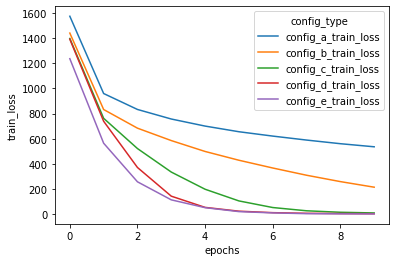

In [13]:
sns.lineplot(x="epochs", y="train_loss", hue='config_type', data=df_train)

# Validation Plot

<AxesSubplot:xlabel='epochs', ylabel='validation_loss'>

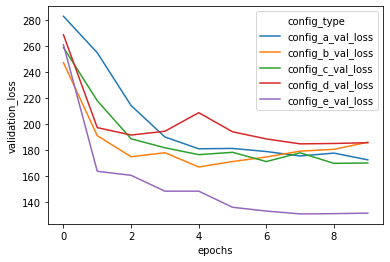

In [14]:
sns.lineplot(x="epochs", y="validation_loss", hue='config_type', data=df_val)

# Accuracy

[Text(0.5, 0, 'Config Types'), Text(0, 0.5, 'Accuracy')]

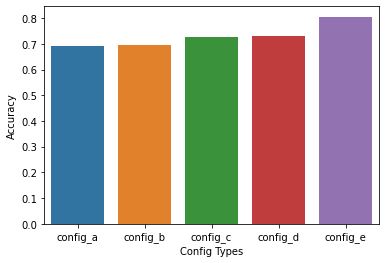

In [15]:
ax = sns.barplot(x = runs, y = accuracy)
ax.set(xlabel='Config Types', ylabel='Accuracy')

# Plot Confusion Matrix of all configurations

<AxesSubplot:>

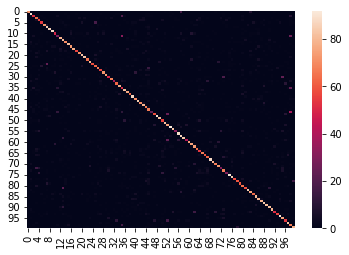

In [16]:
sns.heatmap(conf_mat[0]) #config_a

<AxesSubplot:>

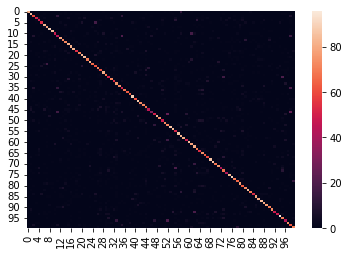

In [17]:
sns.heatmap(conf_mat[1]) #config_b

<AxesSubplot:>

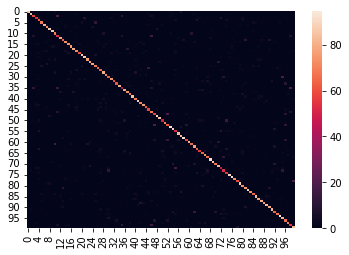

In [18]:
sns.heatmap(conf_mat[2]) #config_c

<AxesSubplot:>

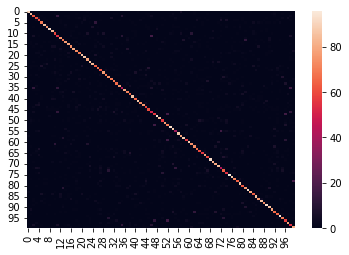

In [19]:
sns.heatmap(conf_mat[3]) #config_d

<AxesSubplot:>

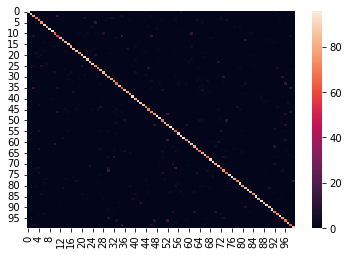

In [20]:
sns.heatmap(conf_mat[4]) #config_e